C:\Users\sreeg\AppData\Local\Temp\ipykernel_22368\1179564711.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='brand', y='battery_capacity', palette=custom_palette, ax=ax1, marker='o', ci=None, linestyle='--')  # Set linestyle and color
C:\Users\sreeg\AppData\Local\Temp\ipykernel_22368\1179564711.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data, x='brand', y='battery_capacity', palette=custom_palette, ax=ax1, marker='o', ci=None, linestyle='--')  # Set linestyle and color


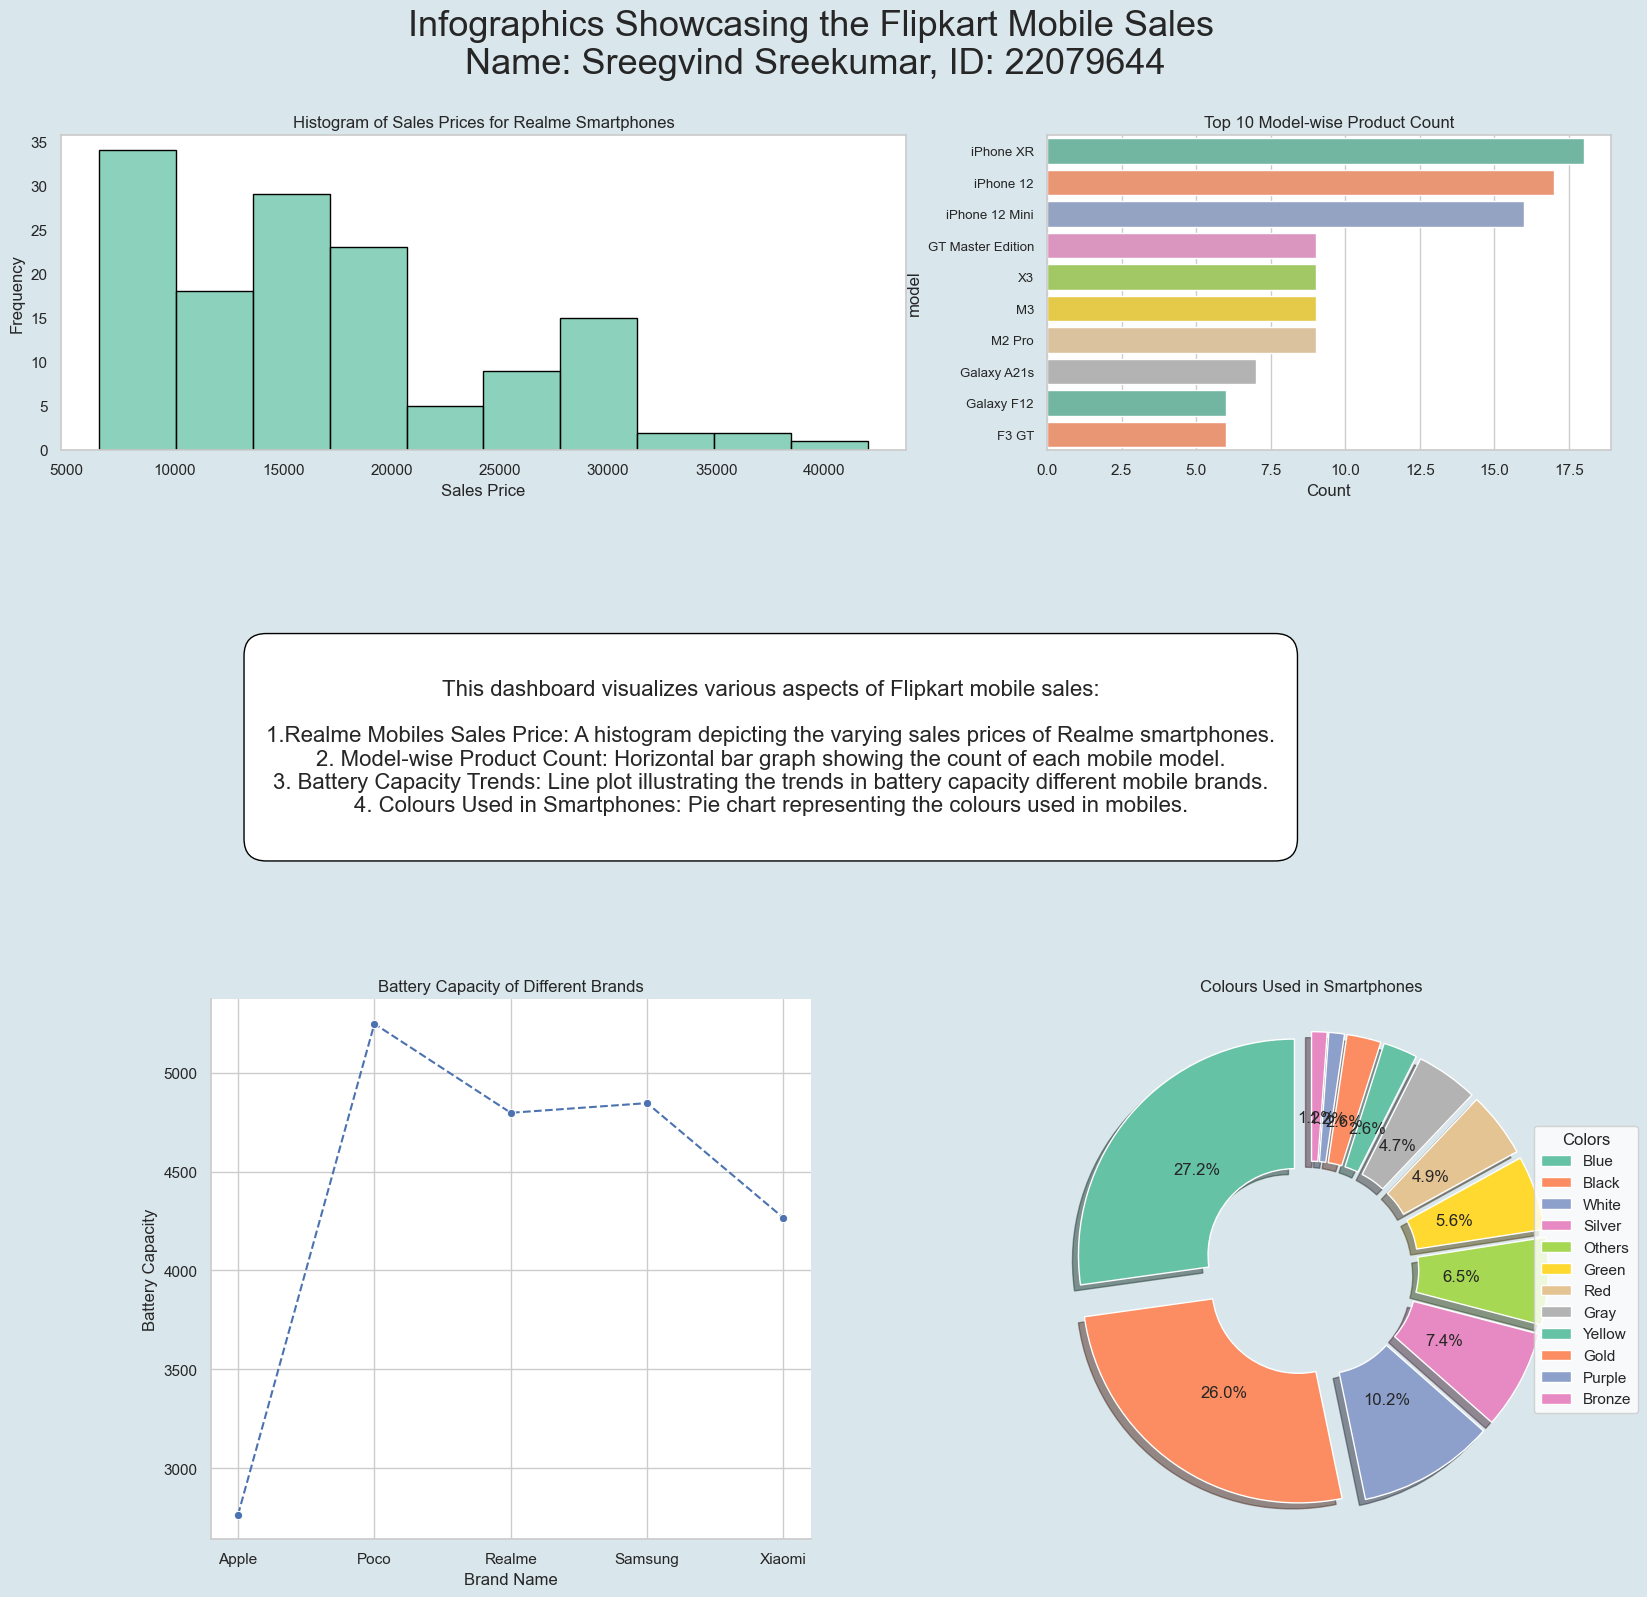

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is in a CSV format
data = pd.read_csv("Flipkart Mobile - 2.csv")

# Filter data for Realme smartphones
realme_data = data[data['brand'] == 'Realme']

# Define a custom color palette
custom_palette = sns.color_palette("Set2")

# Set seaborn style with the color palette
sns.set(style="whitegrid")

# Create a GridSpec layout
from matplotlib import gridspec
fig = plt.figure(figsize=(20, 18), facecolor='#d9e6ec')

# Create a new GridSpec layout with adjusted height ratios
gs = gridspec.GridSpec(3, 2, figure=fig, height_ratios=[1.5, 3, 1], width_ratios=[3, 2])

# Adjusting subplot spacing
plt.subplots_adjust(hspace=0.3, wspace=0.2)  # Adjust these values to control spacing

# Line Plot: Battery Capacity of Different Brands
ax1 = fig.add_subplot(gs[1, 0])  # Corrected subplot coordinates
sns.lineplot(data=data, x='brand', y='battery_capacity', palette=custom_palette, ax=ax1, marker='o', ci=None, linestyle='--')  # Set linestyle and color
ax1.set_xlabel('Brand Name')
ax1.set_ylabel('Battery Capacity')
ax1.set_title('Battery Capacity of Different Brands')

# Remove the grid from the histogram subplot
sns.despine(ax=ax1)

# Set a smaller size only for the line plot without affecting the overall figure size
ax1.set_position([0.2, 0.1, 0.3, 0.3])  # Adjust the position and size as needed

# Mobile Colour Distribution
ax4 = fig.add_subplot(gs[2, 1])
colour_of_devices = data['base_color'].value_counts()
explode = [0.1] * len(colour_of_devices)  # Set explode to make the slices pop out
wedges, texts, autotexts = ax4.pie(colour_of_devices, labels=None, autopct="%1.1f%%", colors=custom_palette, explode=explode, shadow=True, startangle=90, wedgeprops=dict(width=0.6, edgecolor='w'))

# Add legend
ax4.legend(wedges, colour_of_devices.index, title="Colors", loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 1))

ax4.set_title('Colours Used in Smartphones')
ax4.set_position([0.6, 0.1, 0.3, 0.3])  # Adjust the position and size as needed

# Remove color names around the pie chart
for text in texts:
    text.set_text("")

# Histogram of Sales Prices for Realme Smartphones
ax5 = fig.add_subplot(gs[0, 0])
sns.histplot(data=realme_data, x='sales_price', bins=10, color=custom_palette[0], edgecolor='black', ax=ax5)
ax5.set_xlabel('Sales Price')
ax5.set_ylabel('Frequency')
ax5.set_title('Histogram of Sales Prices for Realme Smartphones')


# Remove the grid from the histogram subplot
ax5.yaxis.grid(False)
ax5.xaxis.grid(False)

# Model-wise Product Count (Horizontal Bar Graph)
ax6 = fig.add_subplot(gs[0, 1])
model_counts = data['model'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=model_counts, y=model_counts.index, palette=custom_palette, ax=ax6)
ax6.set_xlabel('Count')
ax6.set_title('Top 10 Model-wise Product Count')
ax6.tick_params(axis='y',labelsize= 9.5)

# Economic Indicators Dashboard Title
fig.suptitle('Infographics Showcasing the Flipkart Mobile Sales\n Name: Sreegvind Sreekumar, ID: 22079644', fontsize=26, y=0.95)

# Adding textbox
explanation = '''
This dashboard visualizes various aspects of Flipkart mobile sales:

1.Realme Mobiles Sales Price: A histogram depicting the varying sales prices of Realme smartphones.
2. Model-wise Product Count: Horizontal bar graph showing the count of each mobile model.
3. Battery Capacity Trends: Line plot illustrating the trends in battery capacity different mobile brands.
4. Colours Used in Smartphones: Pie chart representing the colours used in mobiles.
'''

# The position of the textbox is defined by (left, bottom, width, height)
textbox = plt.figtext(0.48, 0.54, explanation, fontsize=16, wrap=True, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

#Displaying the plot
plt.show()

